In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import pytz
import datetime
# Đọc dữ liệu từ file csv vào dataframe
df = pd.read_csv(".././Dataset/AAPL.csv")
df1=df.reset_index()['Close']

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [21]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest= create_dataset(test_data, time_step)

In [23]:
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=X_train[0][0],
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.01)
kf.em(X_train[0])
test_data

array([[0.72074766],
       [0.7268243 ],
       [0.73563196],
       [0.73296917],
       [0.73235471],
       [0.72347869],
       [0.71938214],
       [0.73884099],
       [0.7462149 ],
       [0.75789029],
       [0.77297942],
       [0.77639327],
       [0.77789536],
       [0.77250153],
       [0.77216013],
       [0.77680301],
       [0.77359399],
       [0.79899299],
       [0.78008027],
       [0.77434504],
       [0.78158237],
       [0.79161907],
       [0.78800041],
       [0.79018522],
       [0.78444998],
       [0.7869762 ],
       [0.76724419],
       [0.76690278],
       [0.78137755],
       [0.78144579],
       [0.78827347],
       [0.80527445],
       [0.83517965],
       [0.8534779 ],
       [0.85668692],
       [0.85934972],
       [0.86296838],
       [0.82794232],
       [0.85136133],
       [0.88590941],
       [0.88229075],
       [0.87539472],
       [0.86228557],
       [0.88604599],
       [0.92605614],
       [0.95268418],
       [0.94913376],
       [0.982

In [24]:
# Dự đoán giá chứng khoán cho tập kiểm tra và tập xác thực
test_observed = test_data
validate_observed = val_data

test_predicted, _ = kf.filter(test_observed)
val_predicted, _ = kf.filter(validate_observed)
val_predicted

array([[0.2956315 ],
       [0.54151808],
       [0.68885637],
       [0.75019192],
       [0.76341548],
       [0.7758217 ],
       [0.77403399],
       [0.78238992],
       [0.78771994],
       [0.77425766],
       [0.77996287],
       [0.78591991],
       [0.77414054],
       [0.75234284],
       [0.73120481],
       [0.75614192],
       [0.76547209],
       [0.76616417],
       [0.76092625],
       [0.74202285],
       [0.72681547],
       [0.72982956],
       [0.72853303],
       [0.73889834],
       [0.74677322],
       [0.73885134],
       [0.70524573],
       [0.68520895],
       [0.66884967],
       [0.66325504],
       [0.67603042],
       [0.66524459],
       [0.66005725],
       [0.64991689],
       [0.62818447],
       [0.63770424],
       [0.64225227],
       [0.62122597],
       [0.62042162],
       [0.61396105],
       [0.63316792],
       [0.64180888],
       [0.64727706],
       [0.66181189],
       [0.66612456],
       [0.67376167],
       [0.6816832 ],
       [0.680

In [25]:
test_predicted=scaler.inverse_transform(test_predicted)
val_predicted=scaler.inverse_transform(val_predicted)

In [26]:
valid_rmse = np.sqrt(np.mean((val_predicted - yval)**2))
test_rmse = np.sqrt(np.mean((test_predicted - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 151.20449577631794
Testing RMSE: 156.84876514842858


In [27]:
lst_output = []
x_input = val_data[60:]
temp_input=list(x_input)
n_steps=78

i = 0
while i < 10:
    if(len(temp_input)>78):
        new=[]
        x_input = temp_input[1:]
        for num in x_input:
            if type(num) == np.ndarray:
                for num2 in num:new.append(num2)
            else:new.append(num)
        x_input=new
        print("{} day input {}".format(i, x_input))

        yhat = kf.filter(x_input)
        yhat = list(yhat)
        print("{} day output {}".format(i,yhat[0][-1]))
        temp_input.extend(yhat[0])
        temp_input = temp_input[1:]
        lst_output.extend(yhat[0][-1])
        i += 1
    else:
        yhat = kf.filter(x_input)
        yhat=list(yhat)
        print(yhat[0])
        temp_input.extend(yhat[0])
        print(len(temp_input))
        lst_output.extend(yhat[0][-1])
        i=i+1

0 day input [0.8131944892321716, 0.7945549322681889, 0.7873858409102334, 0.7883417170268863, 0.8077324219263946, 0.8032943642213277, 0.8178373707059776, 0.8067765526374282, 0.7988564089315591, 0.7710676768893476, 0.7740036367262735, 0.7773491348576926, 0.7589827468047896, 0.7672441860781096, 0.7637621069049938, 0.749423924189083, 0.7535205770837139, 0.7884782980685827, 0.8075958408846979, 0.792370127194475, 0.801041214005273, 0.7854740955046144, 0.7712042579310443, 0.7846548072573447, 0.7991294685996542, 0.8018606046678409, 0.8213877950214341, 0.8155842204899229, 0.8319706272378511, 0.8448067120856211, 0.8349065870747772, 0.8424169808278699, 0.8514295748644019, 0.8379790255381014, 0.833677548874731, 0.8549799991798583, 0.8658360003073553, 0.8831782763442497, 0.891849465570346, 0.8881625626284912, 0.8753947205077637, 0.8815396998497103, 0.8635828500913008, 0.8551848229485974, 0.8504054628483932, 0.887684576776359, 0.8852949479339058, 0.8854314265603043, 0.8938977920176616, 0.90181793572

In [28]:
lst_output=np.array(lst_output).reshape(-1,1)
lst_output=scaler.inverse_transform(lst_output)

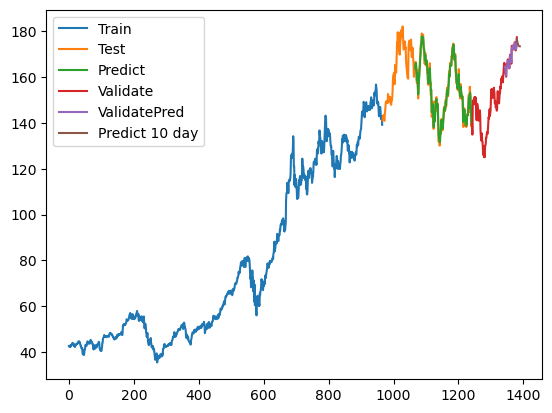

In [29]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(test_predicted[101:,0]))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,val_predicted[101:,0])
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+9, step=1)
plt.plot(prediect_data_index,lst_output[:,0])
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict 10 day'])
plt.show()